<br>
<font color=blue  size=6 face="微軟正黑體">期末專案報告</font> 
<br>
<br>
<font color="#000080"  size=4 face="微軟正黑體">組員 : 胡嘉展(Joser Hu) , 紀弘俊(David Chi)</font>  
<br>
<font color="#000080"  size=4 face="微軟正黑體">主題 : 應用深度學習來識別蔬果</font> 

<br>
<font color="#000080"  size=5 face="微軟正黑體"> 介紹 :</font>  
<br>
<font color="#000080" size=3 face="微軟正黑體"> 
使用卷積神經網路CNN識別蔬果圖像，內容包括 : 蘋果，梨，香蕉，仙人掌果，哈密瓜，櫻桃，萊姆，番茄，葡萄，葡萄柚，番石榴，榛子，桃，柿子，大頭菜，檸檬，荔枝，柑，芒果，芒果，甜瓜，桑樹，橙，木瓜，百香果，桃，鳳梨，辣椒，菠蘿，石榴，柚子蜜，木瓜，紅毛丹，覆盆子，紅醋栗，草莓.....
</font> 

<br>
<font color="#000080"  size=5 face="微軟正黑體"> 實作方法 : </font>
<br>
<font color="#000080"  size=3 face="微軟正黑體"> 使用卷積神經網路CNN(Convolutional neural network)訓練流程</font>  
<img src="CNN_1.png" alt="drawing" style="width: 800px;"/>

<br>
<font color=Red size=3 face="微軟正黑體">[輸入]</font>
<br>
* 圖像大小：100x100 Pixel
* 訓練圖像數量: 52,262
* 測試圖像數量: 17,540張圖

<br>
<font color=Red size=3 face="微軟正黑體"> [輸出]</font>
<br>
* 可分辨蔬果分類數量：101 種水果
* 識別圖像來源 : 經由水果測試圖像進行預測識別出水果種類。

<br>
<font color=Red size=3 face="微軟正黑體">[訓練資料結構]</font>
<br>
1. 建立101種 "英文水果名稱" 目錄，按照英文字母由a~z排列出順序，大約 (0~100) 個目錄。
2. 標註Label (y_train)   : 水果目錄順序碼
3. 特徵Feature (x_train) : 水果目錄下圖像檔

<font color="#000080"  size=5 face="微軟正黑體"> 專案排程與步驟 :</font>  
<img src="CNN_3.png" alt="drawing" style="width: 800px;"/>

<font color=blue  size=5 face="微軟正黑體" > 1. 資料收集 </font> 
<font color="#000080" size=3 face="微軟正黑體"  > 開始構建CNN，對fruits數據集進行多類分類，共有69,908個圖像，分為兩個文件夾 :  </font>
1. 訓練集 : 52,262 筆圖像
2. 測試集 : 17,540 筆圖像

<font color=blue  size=5 face="微軟正黑體" > 2. 資料預處理(Preprocess) </font> 
<br>
<font color="#000080"  size=3 face="微軟正黑體" > 2.1 將圖片資料依水果分類(特徵Feature)及建立分類水果真實名稱為目錄(標註Label) </font> 

In [1]:
# 將圖片檔名及目標標籤載到numpy數組陣列中！
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_files
import numpy as np

train_dir = './fruits-360/Training'
test_dir = './fruits-360/Test'


def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

# Training fruit image :x_train 
# Training label id :y_train
x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)
print('Loading complete!')

print('Training set qty : ' , x_train.shape[0])  
print('Testing set qty : ', x_test.shape[0])      

Loading complete!
Training set qty :  52262
Testing set qty :  17540


In [2]:
# 檢視圖像檔案及標籤 
x_train, y_train

(array(['./fruits-360/Training\\Tomato 2\\134_100.jpg',
        './fruits-360/Training\\Cherry Wax Black\\r_9_100.jpg',
        './fruits-360/Training\\Apple Braeburn\\180_100.jpg', ...,
        './fruits-360/Training\\Pomegranate\\260_100.jpg',
        './fruits-360/Training\\Quince\\45_100.jpg',
        './fruits-360/Training\\Apple Granny Smith\\r_177_100.jpg'],
       dtype='<U55'), array([95, 25,  0, ..., 83, 85,  5]))

In [3]:
# 確認水果種類數量
no_of_classes = len(np.unique(y_train))
no_of_classes

101

In [4]:
# 更改為101個單位向量
print(y_train[0:10])

[95 25  0 68 53 82 33 82 45 63]


In [5]:
from keras.models import model_from_json
from keras.utils import np_utils
# CNN 輸出層的每筆 Data 都是一維陣列
# 所以, 需將 Train & Test Label 資料轉換為 One-Hot Encoding 
y_train = np_utils.to_categorical(y_train,no_of_classes) # 將類向量（整數）轉換為二進制類矩陣 one hot encoding
y_test = np_utils.to_categorical(y_test,no_of_classes)
y_train[0] 


Using TensorFlow backend.


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
      dtype=float32)

<font color="#000080"  size=3 face="微軟正黑體" > 2.2 將資料集劃分為測試和驗證集 </font> 

In [6]:
# 將全測試集圖像資料，劃分測試集和驗證集，前7000個為測試集，7000以後為數據集
x_test,x_valid = x_test[7000:],x_test[:7000] # 7000筆以後為驗證集圖像，前7000筆為測試圖像
y_test,y_valid = y_test[7000:],y_test[:7000] # 7000筆以後為驗證集標籤，前7000筆為測試標籤
print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_valid.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Vaildation X :  (7000,)
Vaildation y : (7000, 101)
Test X :  (10540,)
Test y :  (10540, 101)


In [7]:
x_train[0]
# 訓練數據只是圖像檔，需要將它們轉換為像素矩陣

'./fruits-360/Training\\Tomato 2\\134_100.jpg'

In [8]:
x_train[1]

'./fruits-360/Training\\Cherry Wax Black\\r_9_100.jpg'

<font color="#000080"  size=3 face="微軟正黑體" > 2.3 將像素轉換為數據矩陣</font> 

In [9]:
# 將圖像載入和轉入陣列內
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        images_as_array.append(img_to_array(load_img(file)))   
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Training data shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array(x_valid))
print('Validation data shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test data shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)

Training data shape :  (52262, 100, 100, 3)
Validation data shape :  (7000, 100, 100, 3)
Test data shape :  (10540, 100, 100, 3)
1st training image shape  (100, 100, 3)


In [10]:
print('1st training image as array',x_train[0]) 

1st training image as array [[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


In [11]:
# 將資料線性單位化至  [0,1] 
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_valid = x_valid/255
x_test = x_test/255
# x_train[0]

In [12]:
# 檢查一下
x_train.min(), x_train.max()

(0.0, 1.0)

In [13]:
import matplotlib.pyplot as plt # Data visulation
plt.imshow(x_train[0])

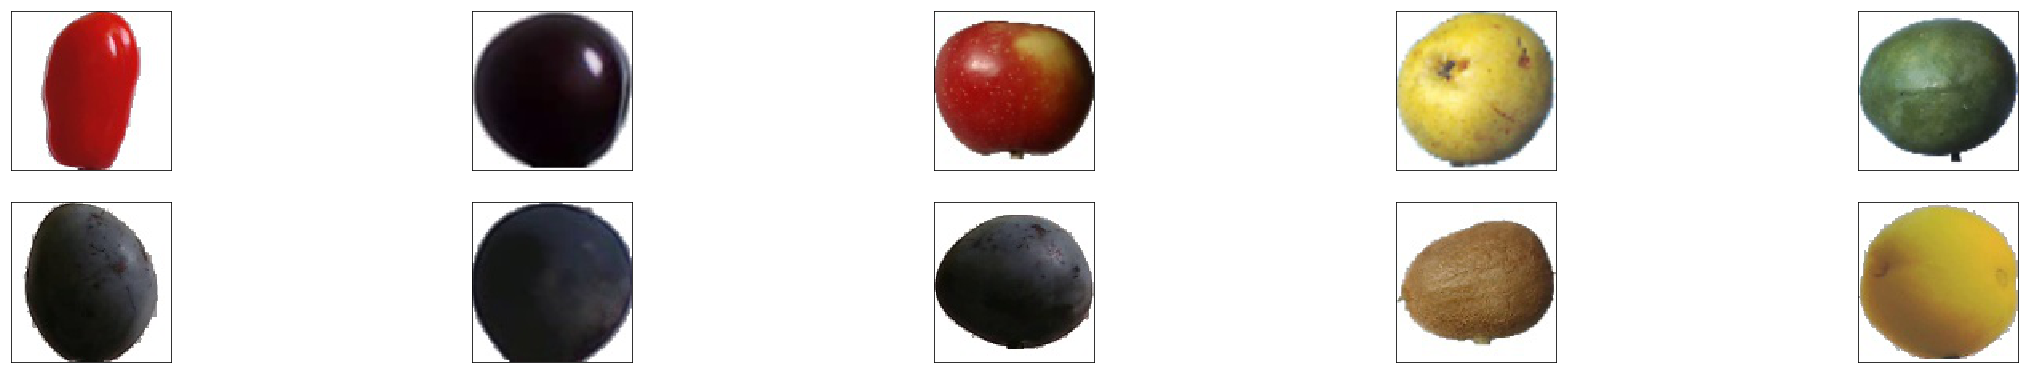

In [14]:
# 可視化前15個訓練圖像！
import matplotlib.pyplot as plt  # Data visulation

fig = plt.figure(figsize =(40,10))
for i in range(10):
    ax = fig.add_subplot(3,5,i+1,xticks=[],yticks=[]) # (nrows, ncols, index, **kwargs) kwargs: xticks->list yticks->list only
    ax.imshow(np.squeeze(x_train[i]))  
    

<font color=blue  size=5 face="微軟正黑體" > 3. 建立模型 </font> 
* 建立CNN 模型，輸入水果圖像，透過卷積層、池化層、提取圖像特徵，再以完全連結神經網路，包括平坦層、隱藏層、輸出層，組成神經網路
* 研讀並選擇合適的Loss functions

<font color="#000080"  size=3 face="微軟正黑體" > 3.1 訓練模型(一) </font> 

In [15]:
# 建立CNN神經網路 - 使用3個Conv層，然後是maxpooling層
# 最後添加dropout，flatten和 fully connected layers(Dense)

from keras.models import Sequential
from keras.models import load_model
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.optimizers import RMSprop,Adam
from keras import backend as K

model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape = (100, 100, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(101, activation = "softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 32)        9248      
__________

<font color="#000080"  size=3 face="微軟正黑體" > 設定模型的訓練方式 : </font> 
<br>
* 設定 Loss 損失函數為 categorical_crossentropy
* 設定 Optimizer 最佳化方法為 adam or rmsprop    
* 設定 Model 評估準確率方法為 accuracy

In [16]:
# 設定模型的訓練方式 (一)
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["accuracy"])

<font color=blue  size=5 face="微軟正黑體" > 4. 訓練模型 </font> 

<font color="#000080"  size=3 face="微軟正黑體" > 提升準確率方式有 : </font> 
<br>
* 可再執行這個函數,進行重覆訓練
* 增加 卷積層 filter 數
* 增加 隱藏層 units 神經元數
* 增加 隱藏層 layer
* 更換訓練神經網路<br>

<font color="#000080"  size=3 face="微軟正黑體" > 訓練說明 : </font> 
<br>
* 模型的保存及重用
* 每次訓練結束後回調比對，並保存最好的模型於hdf5。
* 輸入訓練資料，Feature 水果圖像特徵值與Label水果真實名稱
* 執行15次訓練週期，每一批次50筆資料

In [17]:
# 定義訓練參數，訓練的歷史記錄, 會回傳到指定變數 history
# batch_size : 100
# epochs : 10
history = model.fit(x_train,y_train, batch_size = 100, epochs=10, validation_data=(x_valid, y_valid),verbose=2, shuffle=True)     

Train on 52262 samples, validate on 7000 samples
Epoch 1/10
 - 1025s - loss: 0.0225 - acc: 0.9938 - val_loss: 0.0055 - val_acc: 0.9982
Epoch 2/10
 - 731s - loss: 0.0048 - acc: 0.9982 - val_loss: 0.0025 - val_acc: 0.9991
Epoch 3/10
 - 732s - loss: 0.0030 - acc: 0.9988 - val_loss: 0.0016 - val_acc: 0.9994
Epoch 4/10
 - 733s - loss: 0.0024 - acc: 0.9991 - val_loss: 0.0033 - val_acc: 0.9990
Epoch 5/10
 - 725s - loss: 0.0018 - acc: 0.9993 - val_loss: 0.0012 - val_acc: 0.9996
Epoch 6/10
 - 728s - loss: 0.0016 - acc: 0.9994 - val_loss: 8.4536e-04 - val_acc: 0.9997
Epoch 7/10
 - 565s - loss: 0.0015 - acc: 0.9995 - val_loss: 0.0012 - val_acc: 0.9996
Epoch 8/10
 - 548s - loss: 0.0013 - acc: 0.9995 - val_loss: 0.0010 - val_acc: 0.9996
Epoch 9/10
 - 556s - loss: 0.0012 - acc: 0.9995 - val_loss: 7.7562e-04 - val_acc: 0.9997
Epoch 10/10
 - 546s - loss: 0.0011 - acc: 0.9996 - val_loss: 6.9887e-04 - val_acc: 0.9997


In [18]:
# 將模型儲存至 HDF5 檔案中
model.save("./fruits-360/fruits_model2.hdf5")  # creates a HDF5 file 'my_model.h5'

<font color=black  size=3 face="微軟正黑體" > 使用訓練完成模型，輸入資料進行預測，逐次顯示訓練結果 </font> 
<br>
<font color=black  size=2 face="微軟正黑體" >
. loss:     使用訓練資料, 得到的損失函數誤差值 (值越小, 代表準確率越高)<br>
. acc:      使用訓練資料, 得到的評估準確率     (值在 0~1, 值越大, 代表準確率越高)<br>
. val_loss: 使用驗證資料, 得到的損失函數誤差值 (值越小, 代表準確率越高)<br>
. val_acc:  使用驗證資料, 得到的評估準確率     (值在 0~1, 值越大, 代表準確率越高)</font> 

In [ ]:
# 從 HDF5 檔案中載入模型，必須再執行一次 compile
model = load_model ("./fruits-360/fruits_model2.hdf5")

<font color=blue  size=5 face="微軟正黑體" > 5. 評估模型準確率 </font> 

In [19]:
# 估計準確度 損失和準確率
score = model.evaluate(x_test, y_test, verbose=0)
# 輸出結果
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0008094151257119179
Test accuracy: 0.99971255025556


<font color=blue  size=5 face="微軟正黑體" > 6. 進行預測 </font> 
<br>
<font color="#000080"  size=3 face="微軟正黑體" > 使用訓練完成模型，輸入資料進行預測 </font> 
<br>
<font color="#000080"  size=3 face="微軟正黑體" > 可視化測試預測結果, 隨機抽取測試圖像樣本，並預測標籤和標註數據(ground truth) </font> 

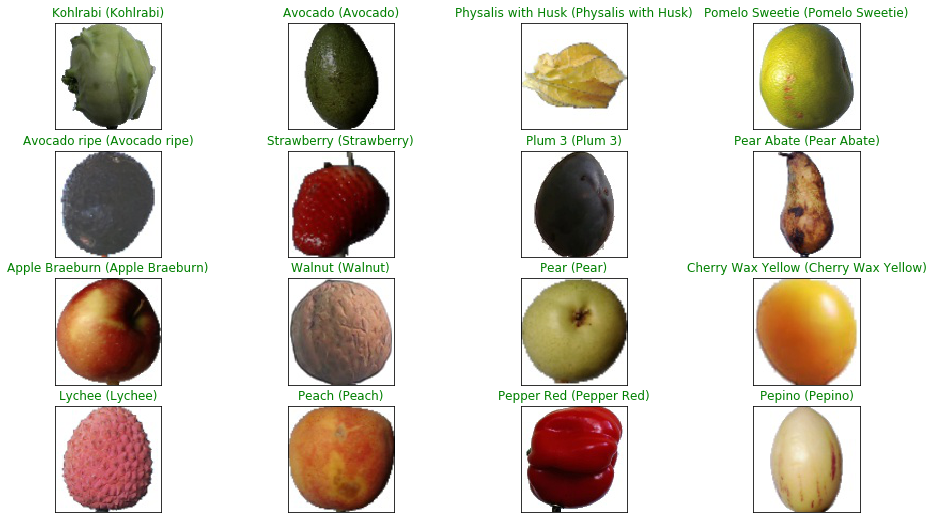

In [20]:
# 可視化測試預測結果
y_pred = model.predict(x_test)
# 隨機抽取測試圖像樣本，並預測標籤和標註數據(ground truth)
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

<font color=blue  size=5 face="微軟正黑體" > 7. 結果報告 </font> 
<br>
<font color="#000080"  size=3 face="微軟正黑體" > 檢視損失和準確性結果 </font> 

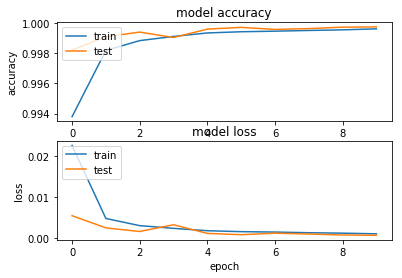

In [21]:
# 檢視損失率和精準度
import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # 準確度結果  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # 損失率結果   
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()